In [2]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount("/content/drive")

In [4]:
# depressed = np.array(["02010002","02010004","02010005","02010006","02010008","02010010","02010011","02010012","02010013","02010015","02010016","02010018","02010019","02010021","02010022","02010023","02010024","02010025","02010026","02010028","02010030","02010033","02010034","02010036"])
# non_depressed = np.array(["02020008","02020010","02020013","02020014","02020015","02020016","02020018","02020019","02020020","02020021","02020022","02020023","02020025","02020026","02020027","02020029","02030002","02030003","02030004","02030005","02030006","02030007","02030009","02030014","02030017","02030018","02030019","02030020","02030021"])

# np.random.seed(42)

# # Randomly select 18 samples from the list
# depressed_train = np.random.choice(depressed, size=18, replace=False)
# non_depressed_train = np.random.choice(non_depressed, size=18, replace=False)

# depressed_test = np.setdiff1d(depressed, depressed_train)
# non_depressed_test = np.setdiff1d(non_depressed, non_depressed_train)

# # Print the randomly selected samples
# print(depressed_train.shape, depressed_test.shape, non_depressed_train.shape, non_depressed_test.shape)
# print(np.intersect1d(depressed_train, depressed_test))
# print(np.intersect1d(non_depressed_train, non_depressed_test))

(18,) (6,) (18,) (11,)
[]
[]


In [5]:
# def getCombinedData(files, batch_size = 2000, prefix = "final dataset_v1/", suffix = ".csv"):
#     dfs = []
#     for file_name in files:
#         df = pd.read_csv(prefix + file_name + suffix)
#         df = df.iloc[:len(df) // batch_size * batch_size, 1:-1]
#         dfs.append(df)

#     return pd.concat(dfs, ignore_index = True)

# depressed_train_df = getCombinedData(depressed_train)
# depressed_test_df = getCombinedData(depressed_test)
# non_depressed_train_df = getCombinedData(non_depressed_train)
# non_depressed_test_df = getCombinedData(non_depressed_test)

In [5]:
# depressed_train_df.to_csv('All/combined_depressed_train.csv', index=False)
# del depressed_train_df

# depressed_test_df.to_csv('All/combined_depressed_test.csv', index=False)
# del depressed_test_df

# non_depressed_train_df.to_csv('All/combined_non_depressed_train.csv', index=False)
# del non_depressed_train_df

# non_depressed_test_df.to_csv('All/combined_non_depressed_test.csv', index=False)
# del non_depressed_test_df

In [3]:
depressed_train_df = pd.read_csv('All/combined_depressed_train.csv')
depressed_test_df = pd.read_csv('All/combined_depressed_test.csv')
non_depressed_train_df = pd.read_csv('All/combined_non_depressed_train.csv')
non_depressed_test_df = pd.read_csv('All/combined_non_depressed_test.csv')

In [7]:
depressed_train_df.shape

(3784000, 128)

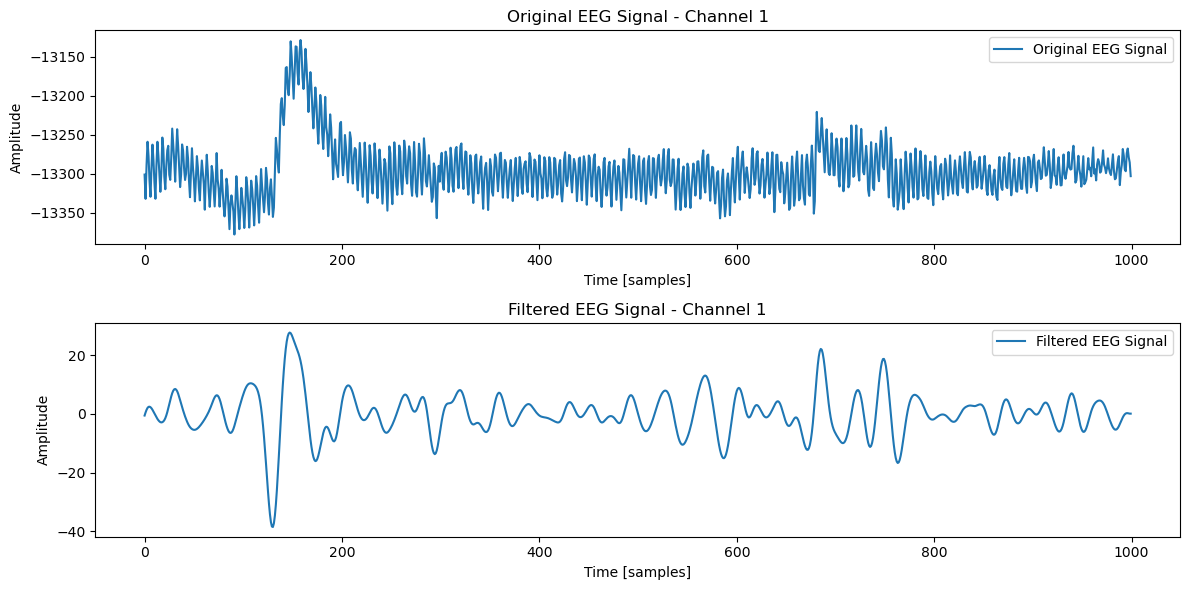

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, iirnotch, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data, axis=0)
    return y

def apply_notch_filter(data, frequency, fs, quality_factor=30):
    nyq = 0.5 * fs
    freq = frequency / nyq
    b, a = iirnotch(freq, quality_factor)
    y = filtfilt(b, a, data, axis=0)
    return y

##EEG Sampling rates
fs = 250
lowcut = 4.0
highcut = 13.0
notch_freq = 50.0


#Filter application
filtered_data = butter_bandpass_filter(depressed_train_df, lowcut, highcut, fs, order=2)
filtered_data = apply_notch_filter(filtered_data, notch_freq, fs)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(depressed_train_df.iloc[0:1000, 1], label='Original EEG Signal')  # Change to plot the first channel
plt.title('Original EEG Signal - Channel 1')
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(filtered_data[0:1000, 1], label='Filtered EEG Signal')  # Change to plot the first channel
plt.title('Filtered EEG Signal - Channel 1')
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
def data_filter(df):
    filtered_data = butter_bandpass_filter(df, lowcut, highcut, fs, order=2)
    filtered_data = apply_notch_filter(filtered_data, notch_freq, fs)
    return filtered_data
filtered_depressed_train = data_filter(depressed_train_df)
filtered_depressed_test = data_filter(depressed_test_df)
filtered_non_depressed_train = data_filter(non_depressed_train_df)
filtered_non_depressed_test = data_filter(non_depressed_test_df)


In [7]:
def getBatchData(data, batch_size = 2000):
    return [data[batch_num: batch_num + batch_size, :] for batch_num in range(0, (len(data) // batch_size)*batch_size, batch_size)]

depressed_train = getBatchData(filtered_depressed_train)
depressed_test = getBatchData(filtered_depressed_test)
non_depressed_train = getBatchData(filtered_non_depressed_train)
non_depressed_test = getBatchData(filtered_non_depressed_test)

In [38]:
raw_depressed_train = getBatchData(depressed_train_df.values)
raw_depressed_test = getBatchData(depressed_test_df.values)
raw_non_depressed_train = getBatchData(non_depressed_train_df.values)
raw_non_depressed_test = getBatchData(non_depressed_test_df.values)


In [40]:
print(np.shape(raw_depressed_train)) 
print(np.shape(raw_depressed_test)) 
print(np.shape(raw_non_depressed_train)) 
print(np.shape(raw_non_depressed_test)) 


(1892, 2000, 128)
(637, 2000, 128)
(1814, 2000, 128)
(1106, 2000, 128)


In [8]:
np.shape(depressed_train)

(1892, 2000, 128)

In [31]:
X_train = np.concatenate((depressed_train, non_depressed_train), axis=0)
Y_train = np.concatenate(([1 for _ in range(len(depressed_train))], [0 for _ in range(len(non_depressed_train))]), axis=0)

X_test = np.concatenate((depressed_test, non_depressed_test), axis=0)
Y_test = np.concatenate(([1 for _ in range(len(depressed_test))], [0 for _ in range(len(non_depressed_test))]), axis=0)

In [41]:
X_train_raw = np.concatenate((raw_depressed_train, raw_non_depressed_train), axis=0)
Y_train_raw = np.concatenate(([1 for _ in range(len(raw_depressed_train))], [0 for _ in range(len(raw_non_depressed_train))]), axis=0)

X_test_raw = np.concatenate((raw_depressed_test, raw_non_depressed_test), axis=0)
Y_test_raw = np.concatenate(([1 for _ in range(len(raw_depressed_test))], [0 for _ in range(len(raw_non_depressed_test))]), axis=0)

In [42]:
print(X_train_raw.shape)
print(X_test_raw.shape)
print(Y_train_raw.shape)
print(Y_test_raw.shape)

(3706, 2000, 128)
(1743, 2000, 128)
(3706,)
(1743,)


In [32]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3706, 2000, 128)
(1743, 2000, 128)
(3706,)
(1743,)


In [33]:
# Generate a random permutation of indices
train_indices = np.random.permutation(len(X_train))
test_indices = np.random.permutation(len(X_test))

X_train = X_train[train_indices]
Y_train = Y_train[train_indices]
Y_test = Y_test[test_indices]
X_test = X_test[test_indices]

In [34]:
print(X_train.shape)

(3706, 2000, 128)


In [12]:
print(Y_train)
print(len(Y_train))
print(X_train.shape)
print(Y_train[0])

[0 0 1 ... 0 0 0]
3706
(3706, 2000, 128)
0


In [21]:
# import os

# def generatePlots(X, Y, output_dir, output_prefix, n_channel = 128):
#     os.makedirs(output_dir, exist_ok=True)

#     for i, data in enumerate(X):
#         fig, ax = plt.subplots(figsize=(10, 6))
#         for channel in range(n_channel):
#             ax.plot(data[:, channel])

#         if(Y[i] == 0):
#             filename = os.path.join(output_dir + '/non-depressed', output_prefix + "_" + str(i + 1) + "_plot.png")
#         if(Y[i] == 1):
#             filename = os.path.join(output_dir + '/depressed', output_prefix + "_" + str(i + 1) + "_plot.png")
#         plt.savefig(filename)
#         plt.close()

#         print(f"Plot saved: {filename}")


# generatePlots(X_train, Y_train, "plots/eeg_train", "eeg_train")
# generatePlots(X_test, Y_test, "plots/eeg_test", "eeg_test")

Plot saved: plots/eeg_train/non-depressed/eeg_train_1_plot.png
Plot saved: plots/eeg_train/depressed/eeg_train_2_plot.png
Plot saved: plots/eeg_train/non-depressed/eeg_train_3_plot.png
Plot saved: plots/eeg_train/depressed/eeg_train_4_plot.png
Plot saved: plots/eeg_train/non-depressed/eeg_train_5_plot.png
Plot saved: plots/eeg_train/depressed/eeg_train_6_plot.png
Plot saved: plots/eeg_train/non-depressed/eeg_train_7_plot.png
Plot saved: plots/eeg_train/non-depressed/eeg_train_8_plot.png
Plot saved: plots/eeg_train/depressed/eeg_train_9_plot.png
Plot saved: plots/eeg_train/depressed/eeg_train_10_plot.png
Plot saved: plots/eeg_train/depressed/eeg_train_11_plot.png
Plot saved: plots/eeg_train/non-depressed/eeg_train_12_plot.png
Plot saved: plots/eeg_train/non-depressed/eeg_train_13_plot.png
Plot saved: plots/eeg_train/non-depressed/eeg_train_14_plot.png
Plot saved: plots/eeg_train/depressed/eeg_train_15_plot.png
Plot saved: plots/eeg_train/non-depressed/eeg_train_16_plot.png
Plot saved: p

In [24]:
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Set paths
train_dir = 'eeg_train'
test_dir = 'eeg_test'

# Set image dimensions
img_width, img_height = 64, 64

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    "./plots/eeg_train",
    batch_size=32,
    classes=['non-depressed', 'depressed'],
    class_mode='binary'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    "./plots/eeg_test",
    batch_size=32,
    classes=['non-depressed', 'depressed'],
    class_mode='binary'
)

Found 3707 images belonging to 2 classes.
Found 1744 images belonging to 2 classes.


In [25]:
print(np.unique(train_generator.classes))
print(np.unique(test_generator.classes))

[0 1]
[0 1]


In [28]:
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

# Set paths
train_dir = './plots/eeg_train'
test_dir = './plots/eeg_test'

def dataGen(img_width, img_height):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        preprocessing_function=preprocess_input
    )
    
    test_datagen = ImageDataGenerator(
        rescale=1./255,
        preprocessing_function=preprocess_input
    )
        
    # Load training data
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        classes=['non-depressed', 'depressed'],
        class_mode='binary'
    )
    
    # Load test data
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        classes=['non-depressed', 'depressed'],
        class_mode='binary'
    )
    return train_generator, test_generator

In [33]:
from keras.callbacks import Callback
from tensorflow.keras.metrics import Precision, Recall, AUC, F1Score

train_generator, test_generator = dataGen(224, 224)

# Load the ResNet50 model pre-trained on ImageNet data, excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Using sigmoid for binary classification

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base_model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', F1Score(name='f1_score')])

model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Found 3707 images belonging to 2 classes.
Found 1744 images belonging to 2 classes.


Epoch 1/10


2024-04-20 15:49:07.420128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


115/115 [==============================] - ETA: 0s - loss: 0.7873 - accuracy: 0.5064 - f1_score: 0.6769

2024-04-20 15:49:30.692218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


115/115 [==============================] - 35s 291ms/step - loss: 0.7873 - accuracy: 0.5064 - f1_score: 0.6769 - val_loss: 0.8240 - val_accuracy: 0.3652 - val_f1_score: 0.5350
Epoch 2/10
115/115 [==============================] - 33s 290ms/step - loss: 0.6975 - accuracy: 0.5439 - f1_score: 0.6754 - val_loss: 0.6726 - val_accuracy: 0.6510 - val_f1_score: 0.5368
Epoch 3/10
115/115 [==============================] - 33s 291ms/step - loss: 0.6747 - accuracy: 0.5774 - f1_score: 0.6750 - val_loss: 0.6833 - val_accuracy: 0.6082 - val_f1_score: 0.5362
Epoch 4/10
115/115 [==============================] - 33s 290ms/step - loss: 0.6832 - accuracy: 0.5758 - f1_score: 0.6766 - val_loss: 0.7106 - val_accuracy: 0.4948 - val_f1_score: 0.5368
Epoch 5/10
115/115 [==============================] - 33s 287ms/step - loss: 0.6518 - accuracy: 0.6114 - f1_score: 0.6759 - val_loss: 0.6899 - val_accuracy: 0.6071 - val_f1_score: 0.5344
Epoch 6/10
115/115 [==============================] - 33s 289ms/step - loss:

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, Conv2D, DepthwiseConv2D, SeparableConv2D, AveragePooling2D, BatchNormalization
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Precision, Recall, AUC, F1Score

def EEGNet(nb_classes=1, Chans=128, Samples=2000, dropoutRate=0.5, kernLength=64, F1=8, D=2, F2=16, norm_rate=0.25):
    input1 = Input(shape=(Chans, Samples, 1))

    block1 = Conv2D(F1, (1, kernLength), padding='same', input_shape=(Chans, Samples, 1), use_bias=False)(input1)
    block1 = BatchNormalization()(block1)
    block1 = DepthwiseConv2D((Chans, 1), use_bias=False, depth_multiplier=D, depthwise_constraint=max_norm(1.))(block1)
    block1 = BatchNormalization()(block1)
    block1 = Activation('elu')(block1)
    block1 = AveragePooling2D((1, 4))(block1)
    block1 = Dropout(dropoutRate)(block1)

    block2 = SeparableConv2D(F2, (1, 16), use_bias=False, padding='same')(block1)
    block2 = BatchNormalization()(block2)
    block2 = Activation('elu')(block2)
    block2 = AveragePooling2D((1, 8))(block2)
    block2 = Dropout(dropoutRate)(block2)

    flatten = Flatten(name='flatten')(block2)
    dense = Dense(nb_classes, name='dense', kernel_constraint=max_norm(norm_rate))(flatten)
    sigmoid = Activation('sigmoid', name='sigmoid')(dense)

    return Model(inputs=input1, outputs=sigmoid)

# Example reshaping of data assuming it's loaded as (num_samples, 2000, 128)
# Here you need to make sure that X_train is in the shape (num_samples, 128, 2000, 1)
# This might require loading your data differently or reshaping it:
# print(X_train.shape)
X_train_resh = np.transpose(X_train_raw, (0, 2, 1)).reshape(-1, 128, 2000, 1)
X_test_resh = np.transpose(X_test_raw, (0, 2, 1)).reshape(-1, 128, 2000, 1)

# Y_train = Y_train.astype('float32')

# Initialize EEGNet
model = EEGNet(nb_classes=1, Chans=128, Samples=2000, dropoutRate=0.5, kernLength=64, F1=8, D=2, F2=16, norm_rate=0.25)

# Using legacy Adam optimizer due to warning on M1/M2 Macs
from tensorflow.keras.optimizers import legacy
model.compile(optimizer=legacy.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', F1Score(name='f1_score')])



# Train the model
history = model.fit(
    X_train_resh,
    Y_train_raw.astype('float32'),
    validation_data=(X_test_resh, Y_test_raw.astype('float32')),
    epochs=10
    
)

# Note: F1 Score is already included in the metrics, no need to calculate manually
print("Final F1 Score on Training Data:", history.history['f1_score'][-1])

Epoch 1/10


2024-04-20 17:04:39.846560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


116/116 [==============================] - ETA: 0s - loss: 0.6902 - accuracy: 0.5353 - f1_score: 0.6760

2024-04-20 17:05:12.109886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


116/116 [==============================] - 34s 288ms/step - loss: 0.6902 - accuracy: 0.5353 - f1_score: 0.6760 - val_loss: 0.6858 - val_accuracy: 0.6311 - val_f1_score: 0.5353
Epoch 2/10
116/116 [==============================] - 26s 220ms/step - loss: 0.6791 - accuracy: 0.5416 - f1_score: 0.6760 - val_loss: 0.6913 - val_accuracy: 0.3999 - val_f1_score: 0.5353
Epoch 3/10
116/116 [==============================] - 26s 221ms/step - loss: 0.6758 - accuracy: 0.5308 - f1_score: 0.6760 - val_loss: 0.6935 - val_accuracy: 0.4114 - val_f1_score: 0.5353
Epoch 4/10
116/116 [==============================] - 25s 220ms/step - loss: 0.6746 - accuracy: 0.5345 - f1_score: 0.6760 - val_loss: 0.6950 - val_accuracy: 0.3941 - val_f1_score: 0.5353
Epoch 5/10
116/116 [==============================] - 26s 220ms/step - loss: 0.6742 - accuracy: 0.5264 - f1_score: 0.6760 - val_loss: 0.6868 - val_accuracy: 0.4263 - val_f1_score: 0.5353
Epoch 6/10
116/116 [==============================] - 26s 221ms/step - loss:

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Conv2D, Flatten, Reshape
from tensorflow.keras.layers import MultiHeadAttention, GlobalAveragePooling2D
from tensorflow.keras.optimizers import legacy

def EEGConformer(nb_classes, input_shape=(128, 2000, 1), head_size=64, num_heads=4, ff_dim=64, dropout_rate=0.1):
    inputs = Input(shape=input_shape)

    # Initial Convolution Block
    x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
    x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(dropout_rate)(x)
    
    # Reshape for Transformer Block
    x = Reshape((-1, 32))(x)  # Reshape into (sequence_length, features)

    # Transformer Block
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(x, x)
    x = LayerNormalization()(x + attention_output)
    ffn_output = Dense(ff_dim, activation='relu')(x)
    ffn_output = Dense(32, activation='relu')(ffn_output)
    x = LayerNormalization()(x + ffn_output)

    # Output layer
    x = Flatten()(x)
    x = Dense(nb_classes, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create model instance
model = EEGConformer(nb_classes=1, input_shape=(2000, 128, 1))

# Compile the model
model.compile(optimizer=legacy.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', F1Score(name='f1_score')])

# Train the model
history = model.fit(
    X_train,
    Y_train.astype('float32'),
    validation_data=(X_test, Y_test.astype('float32')),
    epochs=10
)

# Note: F1 Score is already included in the metrics, no need to calculate manually
print("Final F1 Score on Training Data:", history.history['f1_score'][-1])

Epoch 1/10


2024-04-20 16:57:26.063450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


116/116 [==============================] - ETA: 0s - loss: 0.7067 - accuracy: 0.5054 - f1_score: 0.6760

2024-04-20 16:57:53.210240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


116/116 [==============================] - 29s 248ms/step - loss: 0.7067 - accuracy: 0.5054 - f1_score: 0.6760 - val_loss: 0.6710 - val_accuracy: 0.6345 - val_f1_score: 0.5353
Epoch 2/10
116/116 [==============================] - 13s 114ms/step - loss: 0.6947 - accuracy: 0.5213 - f1_score: 0.6760 - val_loss: 0.7288 - val_accuracy: 0.3660 - val_f1_score: 0.5353
Epoch 3/10
116/116 [==============================] - 13s 111ms/step - loss: 0.6913 - accuracy: 0.5119 - f1_score: 0.6760 - val_loss: 0.7052 - val_accuracy: 0.4045 - val_f1_score: 0.5353
Epoch 4/10
116/116 [==============================] - 13s 113ms/step - loss: 0.6857 - accuracy: 0.5313 - f1_score: 0.6760 - val_loss: 0.7393 - val_accuracy: 0.3655 - val_f1_score: 0.5353
Epoch 5/10
116/116 [==============================] - 13s 111ms/step - loss: 0.6761 - accuracy: 0.5367 - f1_score: 0.6760 - val_loss: 0.6728 - val_accuracy: 0.5674 - val_f1_score: 0.5353
Epoch 6/10
116/116 [==============================] - 13s 112ms/step - loss:

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Assuming X_train, Y_train, X_test, Y_test are already loaded

# Pad EEG data to create pseudo-RGB images
# Assuming each EEG sequence has shape (time_steps, channels)
max_time_steps = max(max(len(seq) for seq in X_train), max(len(seq) for seq in X_test))
num_channels = X_train.shape[2]  # Number of EEG channels

# Pad training data
X_train_padded = np.zeros((len(X_train), max_time_steps, num_channels))
for i, seq in enumerate(X_train):
    pad_length = max_time_steps - len(seq)
    X_train_padded[i] = np.pad(seq, ((0, pad_length), (0, 0)), mode='constant')

# Pad testing data
X_test_padded = np.zeros((len(X_test), max_time_steps, num_channels))
for i, seq in enumerate(X_test):
    pad_length = max_time_steps - len(seq)
    X_test_padded[i] = np.pad(seq, ((0, pad_length), (0, 0)), mode='constant')

# Reshape EEG data to add a single channel dimension
X_train_reshaped = np.expand_dims(X_train_padded, axis=-1)
X_test_reshaped = np.expand_dims(X_test_padded, axis=-1)

# Convert single-channel data to mimic RGB image (3 channels)
X_train_rgb = np.repeat(X_train_reshaped, 3, axis=-1)
X_test_rgb = np.repeat(X_test_reshaped, 3, axis=-1)

# Load pre-trained ResNet50 without top layers
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(max_time_steps, num_channels, 3))

# Freeze pre-trained layers
for layer in resnet.layers:
    layer.trainable = False

# Build a new model on top of ResNet50
model = Sequential([
    resnet,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_rgb, Y_train,
    epochs=10,  # Adjust as needed
    batch_size=32,
    validation_split=0.2  # Split for validation
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_rgb, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


In [14]:
## Resnet 50, VGG 16, VGG19, DenseNet
from tensorflow.keras.applications import ResNet50V2 as ResNet
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.optimizers import SGD

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, Model


# Define ResNet block
def resnet_block(x, filters, kernel_size=3, strides=1, activation='relu'):
    y = layers.Conv1D(filters, kernel_size, strides=strides, padding='same')(x)
    y = layers.BatchNormalization()(y)
    y = layers.Activation(activation)(y)
    y = layers.Conv1D(filters, kernel_size, padding='same')(y)
    y = layers.BatchNormalization()(y)

    if strides != 1 or x.shape[-1] != filters:
        x = layers.Conv1D(filters, 1, strides=strides, padding='same')(x)

    out = layers.Add()([x, y])
    out = layers.Activation(activation)(out)
    return out

# Define ResNet model
def ResNet(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv1D(64, 7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling1D(pool_size=3, strides=2, padding='same')(x)

    # Stack of residual blocks
    x = resnet_block(x, filters=64)
    x = resnet_block(x, filters=64)
    x = resnet_block(x, filters=64)

    x = resnet_block(x, filters=128, strides=2)
    x = resnet_block(x, filters=128)

    x = resnet_block(x, filters=256, strides=2)
    x = resnet_block(x, filters=256)

    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs, outputs, name='resnet')
    return model


# Display model summary
model.summary()

NameError: name 'model' is not defined

In [ ]:
# Create ResNet model
model = ResNet(X_train.shape, 2)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test, Y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_acc)

ValueError: Input 0 of layer "max_pooling1d_2" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 7466, 500, 64)

In [ ]:
#RESNET 1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, ReLU, Add, GlobalAveragePooling1D, Dense
from tensorflow.keras.regularizers import l2

def conv1d_bn(x, filters, kernel_size, strides=1, padding='same', use_bias=False, kernel_regularizer=l2(1e-4)):
    x = Conv1D(filters, kernel_size, strides=strides, padding=padding, use_bias=use_bias, kernel_regularizer=kernel_regularizer)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

def residual_block(x, filters, kernel_size, strides=1, downsample=False):
    residual = x
    if downsample:
        residual = Conv1D(filters, 1, strides=strides, padding='same', use_bias=False, kernel_regularizer=l2(1e-4))(residual)
        residual = BatchNormalization()(residual)

    x = conv1d_bn(x, filters, kernel_size, strides=strides)
    x = conv1d_bn(x, filters, kernel_size, strides=1)

    x = Add()([x, residual])
    x = ReLU()(x)
    return x

def resnet50_1d(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = conv1d_bn(inputs, 64, 7, strides=2)
    x = conv1d_bn(x, 64, 3, strides=2)

    for filters in [64, 128, 256, 512]:
        for i in range(3):
            if i == 0:
                x = residual_block(x, filters, 3, strides=2, downsample=True)
            else:
                x = residual_block(x, filters, 3, strides=1)

    x = GlobalAveragePooling1D()(x)
    outputs = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Example usage
input_shape = (batch_size, 128)  # Shape of your EEG data (timesteps, features)
num_classes = 1  # Number of classes

model = resnet50_1d(input_shape, num_classes)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.summary()

2024-04-04 16:49:38.634090: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-04-04 16:49:38.634113: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 128.00 GB
2024-04-04 16:49:38.634119: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 48.00 GB
2024-04-04 16:49:38.634182: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-04 16:49:38.634430: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 3000, 128)]          0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 1500, 64)             57344     ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 1500, 64)             256       ['conv1d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 re_lu (ReLU)                (None, 1500, 64)             0         ['batch_normalization[0][0

In [ ]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test, Y_test), callbacks=[early_stopping])

Epoch 1/10


2024-04-04 16:49:45.812272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


78/78 [==============================] - ETA: 0s - loss: 1.3047 - accuracy: 0.6620

2024-04-04 16:49:59.411997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


78/78 [==============================] - 19s 173ms/step - loss: 1.3047 - accuracy: 0.6620 - val_loss: 2.0674 - val_accuracy: 0.6345
Epoch 2/10
78/78 [==============================] - 12s 153ms/step - loss: 0.9449 - accuracy: 0.8432 - val_loss: 2.4766 - val_accuracy: 0.6328
Epoch 3/10
78/78 [==============================] - 11s 145ms/step - loss: 0.7846 - accuracy: 0.8979 - val_loss: 2.3558 - val_accuracy: 0.6328
Epoch 4/10
78/78 [==============================] - 11s 147ms/step - loss: 0.6375 - accuracy: 0.9325 - val_loss: 4.2664 - val_accuracy: 0.6345


In [ ]:
# Resnet 1D with dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, ReLU, Add, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

def conv1d_bn(x, filters, kernel_size, strides=1, padding='same', use_bias=False, kernel_regularizer=l2(1e-4)):
    x = Conv1D(filters, kernel_size, strides=strides, padding=padding, use_bias=use_bias, kernel_regularizer=kernel_regularizer)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

def residual_block(x, filters, kernel_size, strides=1, downsample=False):
    residual = x
    if downsample:
        residual = Conv1D(filters, 1, strides=strides, padding='same', use_bias=False, kernel_regularizer=l2(1e-4))(residual)
        residual = BatchNormalization()(residual)

    x = conv1d_bn(x, filters, kernel_size, strides=strides)
    x = conv1d_bn(x, filters, kernel_size, strides=1)

    x = Add()([x, residual])
    x = ReLU()(x)
    return x

def resnet50_1d(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = conv1d_bn(inputs, 64, 7, strides=2)
    x = conv1d_bn(x, 64, 3, strides=2)

    for filters in [64, 128, 256, 512]:
        for i in range(3):
            if i == 0:
                x = residual_block(x, filters, 3, strides=2, downsample=True)
            else:
                x = residual_block(x, filters, 3, strides=1)
            if i == 2:
                x = Dropout(0.5)(x)  # Add dropout after each residual block

    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.5)(x)  # Add dropout before the final dense layer
    outputs = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Example usage
input_shape = (batch_size, 128)  # Shape of your EEG data (timesteps, features)
num_classes = 1  # Number of classes

model = resnet50_1d(input_shape, num_classes)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test), callbacks=[early_stopping])

# Print the model summary
model.summary()

Epoch 1/100


2024-04-04 16:51:21.418992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


78/78 [==============================] - ETA: 0s - loss: 1.4445 - accuracy: 0.5205

2024-04-04 16:51:37.665704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


78/78 [==============================] - 23s 232ms/step - loss: 1.4445 - accuracy: 0.5205 - val_loss: 1.6105 - val_accuracy: 0.6490
Epoch 2/100
78/78 [==============================] - 14s 176ms/step - loss: 1.2211 - accuracy: 0.6596 - val_loss: 2.0328 - val_accuracy: 0.6635
Epoch 3/100
78/78 [==============================] - 14s 178ms/step - loss: 1.0069 - accuracy: 0.7866 - val_loss: 1.5833 - val_accuracy: 0.6593
Epoch 4/100
78/78 [==============================] - 15s 198ms/step - loss: 0.7469 - accuracy: 0.8919 - val_loss: 3.2326 - val_accuracy: 0.6328
Epoch 5/100
78/78 [==============================] - 16s 209ms/step - loss: 0.6604 - accuracy: 0.9208 - val_loss: 1.7839 - val_accuracy: 0.6319
Epoch 6/100
78/78 [==============================] - 15s 196ms/step - loss: 0.5863 - accuracy: 0.9361 - val_loss: 2.5328 - val_accuracy: 0.6345
Epoch 7/100
78/78 [==============================] - 15s 190ms/step - loss: 0.4919 - accuracy: 0.9542 - val_loss: 1.7341 - val_accuracy: 0.6311
Epoc

In [ ]:
#ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

def create_ann_model(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer=l2(1e-4)),
        Dropout(0.5),
        Dense(num_classes, activation='sigmoid')
    ])
    return model

# Example usage
input_shape = (batch_size, 128)  # Shape of your EEG data (timesteps, features)
num_classes = 1  # Number of classes

model = create_ann_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test), callbacks=[early_stopping])

# Print the model summary
model.summary

Epoch 1/100


2024-04-04 14:01:50.289561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


234/234 [==============================] - ETA: 0s - loss: 472055.4688 - accuracy: 0.8658

2024-04-04 14:01:56.187286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


234/234 [==============================] - 7s 26ms/step - loss: 472055.4688 - accuracy: 0.8658 - val_loss: 3016591.0000 - val_accuracy: 0.5885
Epoch 2/100
234/234 [==============================] - 4s 19ms/step - loss: 284601.7500 - accuracy: 0.9577 - val_loss: 8272706.5000 - val_accuracy: 0.5862
Epoch 3/100
234/234 [==============================] - 5s 20ms/step - loss: 85521.6016 - accuracy: 0.9878 - val_loss: 11293982.0000 - val_accuracy: 0.5176
Epoch 4/100
234/234 [==============================] - 4s 19ms/step - loss: 468278.3438 - accuracy: 0.9729 - val_loss: 32984182.0000 - val_accuracy: 0.6070
Epoch 5/100
234/234 [==============================] - 4s 19ms/step - loss: 121347.6250 - accuracy: 0.9914 - val_loss: 28162254.0000 - val_accuracy: 0.5572
Epoch 6/100
234/234 [==============================] - 4s 18ms/step - loss: 914507.9375 - accuracy: 0.9783 - val_loss: 41736168.0000 - val_accuracy: 0.5330


<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x47d6c61c0>>

In [ ]:
# CNN + LSTM + BATCHNORM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

def create_cnn_lstm_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        LSTM(64, return_sequences=True),
        LSTM(64),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='sigmoid')
    ])
    return model

# Example usage
input_shape = (batch_size, 128)  # Shape of your EEG data (timesteps, features)
num_classes = 1  # Number of classes

# Set the learning rate
learning_rate = 3e-4

adam_optimizer = Adam(learning_rate=learning_rate)

model = create_cnn_lstm_model(input_shape, num_classes)
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test), callbacks=[early_stopping])

# Print the model summary
model.summary()

Epoch 1/100


2024-04-04 17:16:00.267991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-04 17:16:00.569931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-04 17:16:00.625501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-04 17:16:00.919129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-04 17:16:01.034239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


78/78 [==============================] - ETA: 0s - loss: 0.8309 - accuracy: 0.5414

2024-04-04 17:16:07.886100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-04 17:16:08.048477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-04 17:16:08.099608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


78/78 [==============================] - 10s 100ms/step - loss: 0.8309 - accuracy: 0.5414 - val_loss: 0.7055 - val_accuracy: 0.3664
Epoch 2/100
78/78 [==============================] - 6s 78ms/step - loss: 0.7593 - accuracy: 0.5595 - val_loss: 0.7006 - val_accuracy: 0.3672
Epoch 3/100
78/78 [==============================] - 6s 78ms/step - loss: 0.7298 - accuracy: 0.5792 - val_loss: 0.6973 - val_accuracy: 0.4526
Epoch 4/100
78/78 [==============================] - 6s 78ms/step - loss: 0.6982 - accuracy: 0.5924 - val_loss: 0.6746 - val_accuracy: 0.6234
Epoch 5/100
78/78 [==============================] - 6s 78ms/step - loss: 0.6670 - accuracy: 0.6290 - val_loss: 0.6709 - val_accuracy: 0.6260
Epoch 6/100
78/78 [==============================] - 6s 78ms/step - loss: 0.6436 - accuracy: 0.6580 - val_loss: 0.6694 - val_accuracy: 0.6311
Epoch 7/100
78/78 [==============================] - 6s 77ms/step - loss: 0.6244 - accuracy: 0.6584 - val_loss: 0.6740 - val_accuracy: 0.6200
Epoch 8/100
78/7

In [ ]:
#CNN + LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

def create_cnn_lstm_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        LSTM(64, return_sequences=True),
        LSTM(64),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='sigmoid')
    ])
    return model

# Example usage
input_shape = (batch_size, 128)  # Shape of your EEG data (timesteps, features)
num_classes = 1  # Number of classes


# Set the learning rate
learning_rate = 3e-4

adam_optimizer = Adam(learning_rate=learning_rate)

model = create_cnn_lstm_model(input_shape, num_classes)
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, Y_train, batch_size=1, epochs=100, validation_data=(X_test, Y_test), callbacks=[early_stopping])

# Print the model summary
model.summary()

Epoch 1/100


2024-04-04 17:26:13.112089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-04 17:26:13.469007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-04 17:26:14.048666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-04 17:26:15.645164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-04 17:26:16.388393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3731/3732 [============================>.] - ETA: 0s - loss: 0.6765 - accuracy: 0.5671

2024-04-04 17:28:12.812592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-04 17:28:12.924361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-04 17:28:12.990964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3732/3732 [==============================] - 140s 36ms/step - loss: 0.6763 - accuracy: 0.5673 - val_loss: 0.7746 - val_accuracy: 0.3650
Epoch 2/100
3732/3732 [==============================] - 135s 36ms/step - loss: 0.6532 - accuracy: 0.6045 - val_loss: 0.7363 - val_accuracy: 0.3679
Epoch 3/100
3732/3732 [==============================] - 135s 36ms/step - loss: 0.6398 - accuracy: 0.6184 - val_loss: 0.7231 - val_accuracy: 0.3770
Epoch 4/100
3732/3732 [==============================] - 135s 36ms/step - loss: 0.6098 - accuracy: 0.6691 - val_loss: 0.7866 - val_accuracy: 0.4391
Epoch 5/100
3732/3732 [==============================] - 135s 36ms/step - loss: 0.5423 - accuracy: 0.7374 - val_loss: 0.8187 - val_accuracy: 0.3679
Epoch 6/100
3732/3732 [==============================] - 135s 36ms/step - loss: 0.4690 - accuracy: 0.7816 - val_loss: 0.9881 - val_accuracy: 0.4214
Epoch 7/100
3732/3732 [==============================] - 135s 36ms/step - loss: 0.4725 - accuracy: 0.7771 - val_loss: 0.7223

KeyboardInterrupt: 

In [ ]:
#LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

def create_lstm_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.5),
        LSTM(64),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='sigmoid')
    ])
    return model

# Example usage
input_shape = (batch_size, 128)  # Shape of your EEG data (timesteps, features)
num_classes = 1  # Number of classes

model = create_lstm_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test), callbacks=[early_stopping])

# Print the model summary
model.summary()

Epoch 1/100


2024-04-04 16:55:07.688879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-04 16:55:07.897577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-04 16:55:08.042311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-04 16:55:08.284362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/78 [..............................] - ETA: 2:09 - loss: 0.7398 - accuracy: 0.4688

2024-04-04 16:55:08.599399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


78/78 [==============================] - ETA: 0s - loss: 0.7165 - accuracy: 0.5113

2024-04-04 16:55:26.532011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-04 16:55:26.637230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-04 16:55:26.700676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


78/78 [==============================] - 22s 265ms/step - loss: 0.7165 - accuracy: 0.5113 - val_loss: 0.7223 - val_accuracy: 0.4500
Epoch 2/100
78/78 [==============================] - 19s 246ms/step - loss: 0.6908 - accuracy: 0.5607 - val_loss: 0.7357 - val_accuracy: 0.4441
Epoch 3/100
78/78 [==============================] - 19s 246ms/step - loss: 0.6637 - accuracy: 0.5920 - val_loss: 0.7359 - val_accuracy: 0.5004
Epoch 4/100
78/78 [==============================] - 19s 246ms/step - loss: 0.6432 - accuracy: 0.6286 - val_loss: 0.7784 - val_accuracy: 0.4483
Epoch 5/100
78/78 [==============================] - 19s 245ms/step - loss: 0.6128 - accuracy: 0.6592 - val_loss: 0.8954 - val_accuracy: 0.3971
Epoch 6/100
78/78 [==============================] - 19s 246ms/step - loss: 0.6354 - accuracy: 0.6861 - val_loss: 0.9395 - val_accuracy: 0.6345
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param

In [ ]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, GlobalAveragePooling2D, Reshape, Resizing, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Reshape the data to add a channel dimension, making it (N, batch_size, 128, 1)
X_train_reshaped = X_train.reshape((*X_train.shape, 1))
X_test_reshaped = X_test.reshape((*X_test.shape, 1))

# Create a custom model using ResNet50
model = Sequential([
    # Add a Conv2D layer to process the single-channel input
    Conv2D(3, (3, 3), strides=(2, 2), padding='same', activation='relu', input_shape=(batch_size, 128, 1)),
    BatchNormalization(),

    # Add additional convolutional and pooling layers to reduce dimensions
    Resizing(224, 224),
    # Add the ResNet50 model (without the top layers)
    ResNet50(include_top=False, weights=None, input_shape=(224, 224, 3)),

    # Add a global average pooling layer and dropout for regularization
    GlobalAveragePooling2D(),
    Dropout(0.5),

    # Add a dense layer for the output
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_reshaped, Y_train, batch_size=32, epochs=10, validation_data=(X_test_reshaped, Y_test), callbacks=[early_stopping])

# Print the model summary
model.summary()

Epoch 1/10


2024-03-21 14:38:24.355857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


234/234 [==============================] - ETA: 0s - loss: 0.2134 - accuracy: 0.9420

2024-03-21 14:39:10.777679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


234/234 [==============================] - 54s 219ms/step - loss: 0.2134 - accuracy: 0.9420 - val_loss: 0.9770 - val_accuracy: 0.6949
Epoch 2/10
234/234 [==============================] - 50s 213ms/step - loss: 0.0249 - accuracy: 0.9924 - val_loss: 1.9529 - val_accuracy: 0.5128
Epoch 3/10
234/234 [==============================] - 50s 214ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 2.3060 - val_accuracy: 0.5455
Epoch 4/10
234/234 [==============================] - 52s 224ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 3.0747 - val_accuracy: 0.5706
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 500, 64, 3)        30        
                                                                 
 batch_normalization_30 (Ba  (None, 500, 64, 3)        12        
 tchNormalization)                                               
            

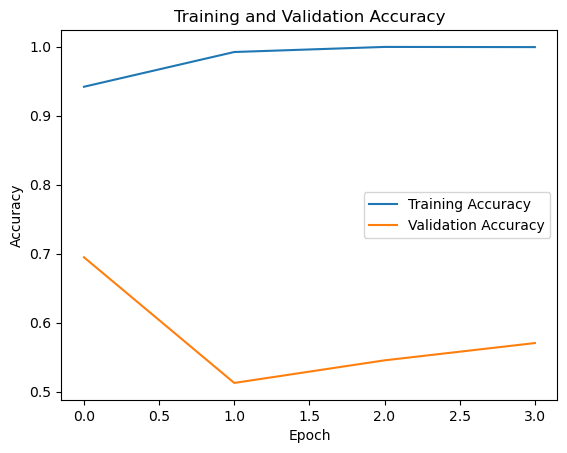

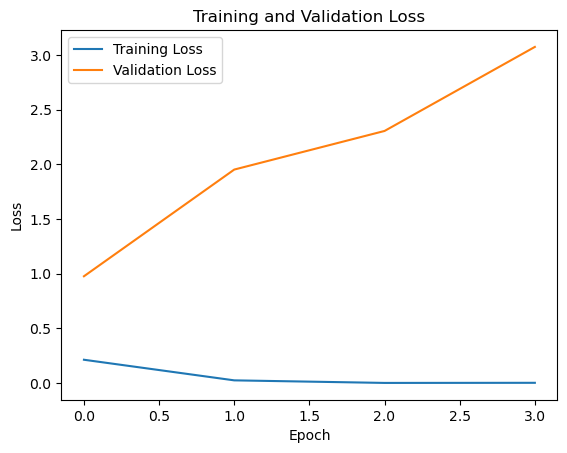

In [ ]:
import matplotlib.pyplot as plt

# Visualize training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Visualize training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import RMSprop

vgg16_model = Sequential([
    # Add a Conv2D layer to process the single-channel input
    Conv2D(3, (3, 3), strides=(2, 2), padding='same', activation='relu', input_shape=(batch_size, 128, 1)),
    BatchNormalization(),

    # Resize the input to the expected shape of VGG16 (224, 224, 3)
    Resizing(224, 224),

    # Add the VGG16 model (without the top layers)
    VGG16(include_top=False, weights=None, input_shape=(224, 224, 3)),

    # Add a global average pooling layer and dropout for regularization
    GlobalAveragePooling2D(),
    Dropout(0.5),

    # Add a dense layer for the output
    Dense(1, activation='sigmoid')  # Adjust the number of units according to your number of classes
])

# Compile the model
rmsprop = RMSprop(lr=0.001)  # You can adjust the learning rate and momentum as needed
model.compile(optimizer=rmsprop,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history_vgg16 = model.fit(X_train_reshaped, Y_train, batch_size=32, epochs=10, validation_data=(X_test_reshaped, Y_test), callbacks=[early_stopping])

# Print the model summary
vgg16_model.summary()

Epoch 1/10


2024-03-21 14:59:44.461622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


234/234 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9965

2024-03-21 15:00:41.834284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


234/234 [==============================] - 67s 235ms/step - loss: 0.0126 - accuracy: 0.9965 - val_loss: 2.7435 - val_accuracy: 0.6198
Epoch 2/10
234/234 [==============================] - 54s 230ms/step - loss: 0.0072 - accuracy: 0.9987 - val_loss: 4.4862 - val_accuracy: 0.5242
Epoch 3/10
234/234 [==============================] - 65s 279ms/step - loss: 0.0057 - accuracy: 0.9991 - val_loss: 5.6026 - val_accuracy: 0.5327
Epoch 4/10
234/234 [==============================] - 119s 509ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 4.0830 - val_accuracy: 0.5600
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 500, 64, 3)        30        
                                                                 
 batch_normalization_36 (Ba  (None, 500, 64, 3)        12        
 tchNormalization)                                               
           

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers.legacy import RMSprop

vgg19_model = Sequential([
    # Add a Conv2D layer to process the single-channel input
    Conv2D(3, (3, 3), strides=(2, 2), padding='same', activation='relu', input_shape=(batch_size, 128, 1)),
    BatchNormalization(),

    # Resize the input to the expected shape of VGG16 (224, 224, 3)
    Resizing(224, 224),

    # Add the VGG16 model (without the top layers)
    VGG19(include_top=False, weights=None, input_shape=(224, 224, 3)),

    # Add a global average pooling layer and dropout for regularization
    GlobalAveragePooling2D(),
    Dropout(0.5),

    # Add a dense layer for the output
    Dense(1, activation='sigmoid')  # Adjust the number of units according to your number of classes
])

# Compile the model
rmsprop = RMSprop(learning_rate=0.001)  # You can adjust the learning rate and momentum as needed
model.compile(optimizer=rmsprop,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history_vgg19 = model.fit(X_train_reshaped, Y_train, batch_size=32, epochs=10, validation_data=(X_test_reshaped, Y_test), callbacks=[early_stopping])

# Print the model summary
vgg19_model.summary()

Epoch 1/10


2024-03-22 18:12:33.021198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


234/234 [==============================] - ETA: 0s - loss: 2.6409e-08 - accuracy: 1.0000

2024-03-22 18:14:29.897134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


234/234 [==============================] - 136s 367ms/step - loss: 2.6409e-08 - accuracy: 1.0000 - val_loss: 6.6926 - val_accuracy: 0.5768
Epoch 2/10
234/234 [==============================] - 58s 247ms/step - loss: 9.5044e-04 - accuracy: 0.9996 - val_loss: 6.4932 - val_accuracy: 0.5569
Epoch 3/10
234/234 [==============================] - 63s 271ms/step - loss: 3.1930e-04 - accuracy: 0.9999 - val_loss: 8.0355 - val_accuracy: 0.5472
Epoch 4/10
234/234 [==============================] - 74s 315ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 5.3267 - val_accuracy: 0.5956
Epoch 5/10
234/234 [==============================] - 66s 280ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 6.1839 - val_accuracy: 0.6044
Epoch 6/10
234/234 [==============================] - 62s 265ms/step - loss: 0.0028 - accuracy: 0.9997 - val_loss: 6.1181 - val_accuracy: 0.6343
Epoch 7/10
234/234 [==============================] - 62s 267ms/step - loss: 2.5590e-07 - accuracy: 1.0000 - val_loss: 5.7432 - 

In [52]:
## VGG16 1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

def VGG16_1D(input_shape, num_classes):
    model = Sequential([
        # Block 1
        Conv1D(64, 3, padding='same', activation='relu', input_shape=input_shape),
        Conv1D(64, 3, padding='same', activation='relu'),
        MaxPooling1D(2, strides=2),

        # Block 2
        Conv1D(128, 3, padding='same', activation='relu'),
        Conv1D(128, 3, padding='same', activation='relu'),
        MaxPooling1D(2, strides=2),

        # Block 3
        Conv1D(256, 3, padding='same', activation='relu'),
        Conv1D(256, 3, padding='same', activation='relu'),
        Conv1D(256, 3, padding='same', activation='relu'),
        MaxPooling1D(2, strides=2),

        # Block 4
        Conv1D(512, 3, padding='same', activation='relu'),
        Conv1D(512, 3, padding='same', activation='relu'),
        Conv1D(512, 3, padding='same', activation='relu'),
        MaxPooling1D(2, strides=2),

        # Block 5
        Conv1D(512, 3, padding='same', activation='relu'),
        Conv1D(512, 3, padding='same', activation='relu'),
        Conv1D(512, 3, padding='same', activation='relu'),
        MaxPooling1D(2, strides=2),

        # Dense layers
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='sigmoid')
    ])

    return model

# Example usage
input_shape = (2000, 128)  # Example input shape (e.g., for 1 second of audio sampled at 16 kHz)
num_classes = 1  # Example number of classes
model = VGG16_1D(input_shape, num_classes)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs = 10, validation_data = (X_test, Y_test))


Epoch 1/10


2024-04-20 17:16:37.338758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


116/116 [==============================] - ETA: 0s - loss: 1.0109 - accuracy: 0.5016

2024-04-20 17:16:46.052148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


116/116 [==============================] - 11s 83ms/step - loss: 1.0109 - accuracy: 0.5016 - val_loss: 0.6568 - val_accuracy: 0.6345
Epoch 2/10
116/116 [==============================] - 7s 62ms/step - loss: 0.7013 - accuracy: 0.4922 - val_loss: 0.7010 - val_accuracy: 0.3655
Epoch 3/10
116/116 [==============================] - 7s 63ms/step - loss: 0.6941 - accuracy: 0.5121 - val_loss: 0.7205 - val_accuracy: 0.3655
Epoch 4/10
116/116 [==============================] - 7s 63ms/step - loss: 0.6958 - accuracy: 0.5032 - val_loss: 0.6771 - val_accuracy: 0.6345
Epoch 5/10
116/116 [==============================] - 7s 63ms/step - loss: 0.6945 - accuracy: 0.5124 - val_loss: 0.7233 - val_accuracy: 0.3655
Epoch 6/10
116/116 [==============================] - 7s 64ms/step - loss: 0.6991 - accuracy: 0.4962 - val_loss: 0.7046 - val_accuracy: 0.3655
Epoch 7/10
116/116 [==============================] - 7s 63ms/step - loss: 0.6985 - accuracy: 0.4879 - val_loss: 0.6880 - val_accuracy: 0.6345
Epoch 8/1

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

def VGG19_1D(input_shape, num_classes):
    model = Sequential([
        # Block 1
        Conv1D(64, 3, padding='same', activation='relu', input_shape=input_shape),
        Conv1D(64, 3, padding='same', activation='relu'),
        MaxPooling1D(2, strides=2),

        # Block 2
        Conv1D(128, 3, padding='same', activation='relu'),
        Conv1D(128, 3, padding='same', activation='relu'),
        MaxPooling1D(2, strides=2),

        # Block 3
        Conv1D(256, 3, padding='same', activation='relu'),
        Conv1D(256, 3, padding='same', activation='relu'),
        Conv1D(256, 3, padding='same', activation='relu'),
        Conv1D(256, 3, padding='same', activation='relu'),
        MaxPooling1D(2, strides=2),

        # Block 4
        Conv1D(512, 3, padding='same', activation='relu'),
        Conv1D(512, 3, padding='same', activation='relu'),
        Conv1D(512, 3, padding='same', activation='relu'),
        Conv1D(512, 3, padding='same', activation='relu'),
        MaxPooling1D(2, strides=2),

        # Block 5
        Conv1D(512, 3, padding='same', activation='relu'),
        Conv1D(512, 3, padding='same', activation='relu'),
        Conv1D(512, 3, padding='same', activation='relu'),
        Conv1D(512, 3, padding='same', activation='relu'),
        MaxPooling1D(2, strides=2),

        # Dense layers
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='sigmoid')
    ])

    return model

# Example usage
input_shape = (2000, 128)  # Example input shape (e.g., for 1 second of audio sampled at 16 kHz)
num_classes = 1  # Example number of classes
model = VGG19_1D(input_shape, num_classes)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs = 10, validation_data = (X_test, Y_test))

Epoch 1/10


2024-04-20 17:27:05.402681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


116/116 [==============================] - ETA: 0s - loss: 0.9925 - accuracy: 0.4995

2024-04-20 17:27:14.462947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


116/116 [==============================] - 11s 85ms/step - loss: 0.9925 - accuracy: 0.4995 - val_loss: 0.7027 - val_accuracy: 0.3655
Epoch 2/10
116/116 [==============================] - 8s 72ms/step - loss: 0.7228 - accuracy: 0.4997 - val_loss: 0.7637 - val_accuracy: 0.3655
Epoch 3/10
116/116 [==============================] - 8s 72ms/step - loss: 0.6974 - accuracy: 0.5038 - val_loss: 0.7037 - val_accuracy: 0.3655
Epoch 4/10
116/116 [==============================] - 8s 72ms/step - loss: 0.6939 - accuracy: 0.5024 - val_loss: 0.6972 - val_accuracy: 0.3643
Epoch 5/10
116/116 [==============================] - 9s 74ms/step - loss: 0.6946 - accuracy: 0.4957 - val_loss: 0.7142 - val_accuracy: 0.3649
Epoch 6/10
116/116 [==============================] - 9s 78ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.7089 - val_accuracy: 0.3655
Epoch 7/10
116/116 [==============================] - 9s 81ms/step - loss: 0.6958 - accuracy: 0.4881 - val_loss: 0.7184 - val_accuracy: 0.3655
Epoch 8/1